In [1]:
import math
import numpy as np
import pyaudio
import sys
import time
import wave
import csv
import matplotlib.pyplot as plt 
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft

In [2]:
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "dtmf.wav"
p = pyaudio.PyAudio()

def sine_wave(frequency, length, rate):
    length = int(length * rate)
    factor = float(frequency) * (math.pi * 2) / rate
    return np.sin(np.arange(length) * factor)


def sine_sine_wave(f1, f2, length, rate):
    s1=sine_wave(f1,length,rate)
    s2=sine_wave(f2,length,rate)
    ss=s1+s2
    sa=np.divide(ss, 2.0)
    return sa
        
def play_tone(stream, frequency=440, length=0.10, rate=44100):
    frames = []
    frames.append(sine_wave(frequency, length, rate))
    chunk = np.concatenate(frames) * 0.25
    stream.write(chunk.astype(numpy.float32).tostring())

def play_dtmf_tone(stream, digits, length=0.2, rate=44100):
    dtmf_freqs = {'1': (1209,697), '2': (1336, 697), '3': (1477, 697),
                  '4': (1209,770), '5': (1336, 770), '6': (1477, 770),
                  '7': (1209,852), '8': (1336, 852), '9': (1477, 852),
                  '*': (1209,941), '0': (1336, 941), '#': (1477, 941)}
    dtmf_digits = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '*', '0', '#']
    if type(digits) is not type(''):
        digits=str(digits)[0]
    digits = ''.join ([dd for dd in digits if dd in dtmf_digits])
    joined_chunks = []
    
    for digit in digits:
        digit=digit.upper()
        frames = []
        frames.append(sine_sine_wave(dtmf_freqs[digit][0], dtmf_freqs[digit][1], length, rate))
        chunk = np.concatenate(frames) * 0.25
        joined_chunks.append(chunk)
        
        # fader section
        fade = 200 # 200ms
        fade_in = np.arange(0., 1., 1/fade)
        fade_out = np.arange(1., 0., -1/fade)

        chunk[:fade] = np.multiply(chunk[:fade], fade_in) # fade sample wave in
        chunk[-fade:] = np.multiply(chunk[-fade:], fade_out) # fade sample wave out
        time.sleep(0.1)
        
    X = np.array(joined_chunks, dtype='float32') # creates an one long array of tone samples to record
    stream.write(X.astype(np.float32).tostring()) # to hear tones
    
    runningTime = np.linspace(0,length,100)
    sound = []
    fs = 8000
    for length in runningTime:
        
        hifrq = np.sin(2*np.pi*dtmf_freqs[digit][0]*length*fs)
        lowfrq = np.sin(2*np.pi*dtmf_freqs[digit][1]*length*fs)
        totalfrq = hifrq + lowfrq
        #ave=np.divide(totalfrq, 2.0)
        sound.append(totalfrq)
        
    
    fourier = np.fft.fft(sound)
    print(len(runningTime))
    print(len(sound))
    print(sound)
    print(length)
    plt.plot(runningTime, sound)
    plt.ylabel('sinus')
    plt.show()
    
    plt.plot(np.absolute(fourier))
    plt.show()
      
    myAudio = "dtmf.wav"
    samplingFreq, mySound = wavfile.read(myAudio)
    mySoundDataType = mySound.dtype
    mySound = mySound / (2.**15)
    mySoundShape = mySound.shape
    samplePoints = float(mySound.shape[0])
    signalDuration = mySound.shape[0]/samplingFreq
    mySoundOneChannel = mySound[:]
    timeArray = np.arange(0, samplePoints, 1)
    timeArray = timeArray/samplingFreq
    timeArray = timeArray * 1000
    plt.plot(timeArray, mySoundOneChannel, color='G')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    
    # record tone sequence float 32 array as a wave file section 
    for i in range(0, int(RECORD_SECONDS)):
        waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
        waveFile.setnchannels(CHANNELS)
        waveFile.setsampwidth(p.get_sample_size(FORMAT))
        waveFile.setframerate(RATE)
        waveFile.writeframes(X.astype(np.float32).tostring())
        waveFile.close()

        
if __name__ == '__main__':
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1, rate=44100, output=1,frames_per_buffer=CHUNK)

1
1
100
100
[0.0, -0.17760285431645018, -0.007969409758501245, 0.5379695397087418, -0.9719039133279097, 0.8045872199858415, 0.06567056286993378, -1.1568687352153382, 1.696029315534348, -1.1913645521642753, -0.15135192304335085, 1.5088130135448474, -1.9886887810692824, 1.2571388752586108, 0.21697740241457059, -1.4856416360460392, 1.7775706733153678, -1.0084247383326659, -0.21510875697160647, 1.0738584897939012, -1.119873923983159, 0.53159491995042, 0.11878234924019349, -0.36292925295725886, 0.18667651336011098, 0.03514947790118217, 0.06471947887831386, -0.47401701744794456, 0.7821591738078557, -0.5416476059396526, -0.2914730089281522, 1.2229595556501387, -1.5405132805350226, 0.8660254039858839, 0.4915665327822809, -1.6845057396729168, 1.8994534371850964, -0.9444232572187536, -0.5901817800169016, 1.7275611428394773, -1.775013803630224, 0.7828480181463959, 0.5328433949190435, -1.326564697187344, 1.2080455466263387, -0.4491806242534506, -0.30677576473664603, 0.5717129570036651, -0.35138957

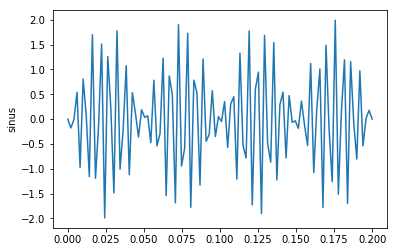

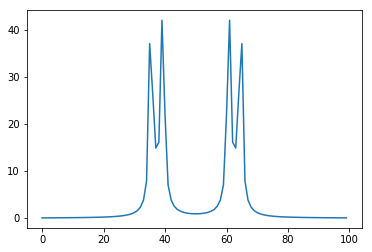

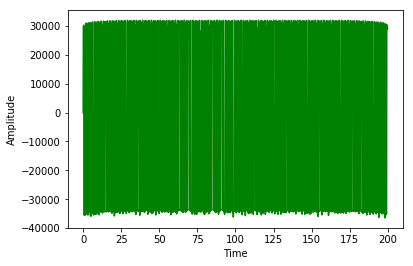

In [3]:
    # Dial a telephone number.
    if len(sys.argv) != 2:
        user_input = input()
        sp_user_input = user_input.split()
        digits = str(np.array([sp_user_input])) # set random length of numbers to pluck from list a
        # below preps random list of numbers for inclusion into csv file
        digits=digits.replace("[",'') # replace characters with null
        digits=digits.replace("]",'')
        digits=digits.replace("'",'')
        digits=digits.replace("\n",'')
        digits=digits.replace(" ",'') # replace space with null
        print(digits)
        
        
    else:
        digits = sys.argv[2]
    play_dtmf_tone(stream, digits)
    
    stream.close()
    p.terminate()

    